In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('18-oct-pca')
jovian.set_colab_id('1z2M9OfC2yS0zb_iBsgpHY2chULF0KXJ8')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/BK_Birla/main/PCA_data.csv")
df.shape

(62184, 11)

# Crowdedness at Campus Gym

In [ ]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [ ]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [ ]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


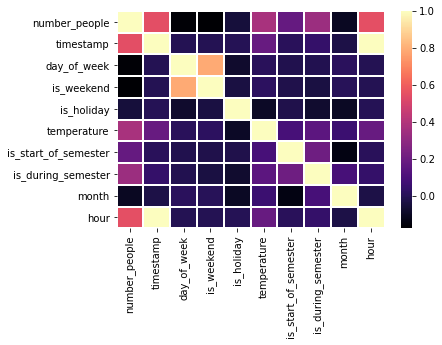

In [ ]:
sns.heatmap(df.corr(), cmap='magma', linewidths=1);

In [ ]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [ ]:
len(df.columns)

11

In [ ]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [ ]:
X = df.iloc[ : , 1: ]
y = df.iloc[ : , 0 ]

In [ ]:
X.head()

,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [ ]:
y.head()

0    37
1    45
2    40
3    44
4    45
Name: number_people, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  62184 non-null  object 
 1   timestamp             62184 non-null  int64  
 2   day_of_week           62184 non-null  int64  
 3   is_weekend            62184 non-null  int64  
 4   is_holiday            62184 non-null  int64  
 5   temperature           62184 non-null  float64
 6   is_start_of_semester  62184 non-null  int64  
 7   is_during_semester    62184 non-null  int64  
 8   month                 62184 non-null  int64  
 9   hour                  62184 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 4.7+ MB


In [ ]:
X.drop(['date'], axis=1, inplace=True)

In [ ]:
X.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,61211,4,0,0,71.76,0,0,8,17
1,62414,4,0,0,71.76,0,0,8,17
2,63015,4,0,0,71.76,0,0,8,17
3,63616,4,0,0,71.76,0,0,8,17
4,64217,4,0,0,71.76,0,0,8,17


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

__Data must be scaled before we go for PCA.__

In [ ]:
col = list(X_train.columns)
col

['timestamp',
 'day_of_week',
 'is_weekend',
 'is_holiday',
 'temperature',
 'is_start_of_semester',
 'is_during_semester',
 'month',
 'hour']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [ ]:
X_train.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
19329,0.436362,1.510975,1.591750,-0.05079,0.385661,-0.291538,0.716938,-1.579075,0.409363
38712,-1.379801,1.510975,1.591750,-0.05079,-0.245076,-0.291538,-1.394821,0.161591,-1.377214
3711,-1.744619,-0.997384,-0.628239,-0.05079,0.309783,-0.291538,0.716938,0.451702,-1.674977
41920,-1.432673,-0.997384,-0.628239,-0.05079,0.096376,3.430082,0.716938,0.161591,-1.377214
43371,0.713859,0.507632,-0.628239,-0.05079,0.723951,-0.291538,0.716938,0.451702,0.707126


In [ ]:
X_test.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
6682,-0.778131,0.005960,-0.628239,-0.05079,0.229162,-0.291538,0.716938,0.741814,-0.781688
37799,0.877185,1.510975,1.591750,-0.05079,0.589583,-0.291538,-1.394821,-0.128520,0.856008
2657,0.262792,0.005960,-0.628239,-0.05079,2.214638,-0.291538,0.716938,0.451702,0.260482
41010,-1.695382,-0.997384,-0.628239,-0.05079,0.123249,-0.291538,-1.394821,0.161591,-1.674977
35104,1.648624,-0.997384,-0.628239,-0.05079,-0.034830,-0.291538,-1.394821,-0.128520,1.600415


# PCA - Considering all Principal Components

In [ ]:
len(X_train.columns)

9

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train[col] = pca.fit_transform(X_train[col])
X_test[col] = pca.transform(X_test[col])

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.30955437e-01, 2.00081683e-01, 1.45123034e-01, 1.28658061e-01,
       1.01643906e-01, 9.27673503e-02, 7.75920089e-02, 2.30759000e-02,
       1.02618932e-04])

In [ ]:
type(explained_variance)

numpy.ndarray

In [ ]:
np.sum(explained_variance)

0.9999999999999999

In [ ]:
np.sum(explained_variance[:2])

0.4310371201414904

In [ ]:
np.sum(explained_variance[:3])

0.5761601542926298

In [ ]:
np.sum(explained_variance[:4])

0.7048182153961506

In [ ]:
np.sum(explained_variance[:5])

0.8064621218734586

In [ ]:
np.sum(explained_variance[:6])

0.8992294721983571

In [ ]:
np.sum(explained_variance[:7])

0.976821481108041

In [ ]:
np.sum(explained_variance[7:])

0.023178518891959

In [ ]:
components = len(explained_variance)
components

9

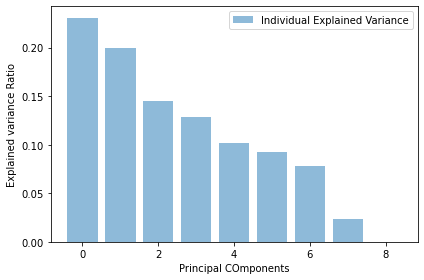

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained variance Ratio")
plt.xlabel("Principal COmponents")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
np.arange(10,200,30)

array([ 10,  40,  70, 100, 130, 160, 190])

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators= n, n_jobs= -1)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)
print(sum(scores)/len(scores))

100%|██████████| 7/7 [00:53<00:00,  7.70s/it]

[0.8878340272456641, 0.8975866779421802, 0.8991252504380133, 0.8989531112868564, 0.9002886994267906, 0.8998011376799276, 0.9001343878067777]
0.8976747559751728


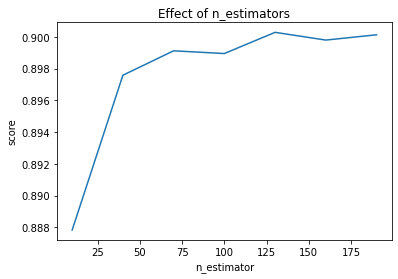

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=130, random_state=0, n_jobs=-1)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=130, n_jobs=-1, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.8992298415704245

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.200665423385055

__The model obtained above is using all the Principal components. Lets try with less number of components.__

# PCA - Considering the first Component only

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
X_train1 = pca1.fit_transform(X_train[col])
X_test1 = pca1.transform(X_test[col])

In [ ]:
explained_variance = pca1.explained_variance_ratio_
explained_variance

array([0.23095544])

In [ ]:
type(explained_variance)

numpy.ndarray

In [ ]:
np.sum(explained_variance)

0.2309554367605429

In [ ]:
components = len(explained_variance)
components

1

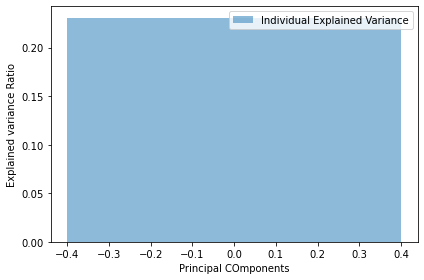

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained variance Ratio")
plt.xlabel("Principal COmponents")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators= n, n_jobs= -1)
    model.fit(X_train1, y_train)
    scores.append(model.score(X_test1, y_test))
print(scores)
print(sum(scores)/len(scores))

100%|██████████| 7/7 [00:14<00:00,  2.00s/it]

[0.15767293073918376, 0.1737143362356076, 0.17768414260487542, 0.17803055293801384, 0.18102590428312904, 0.1809435026757229, 0.18101932377580388]
0.17572724189319094


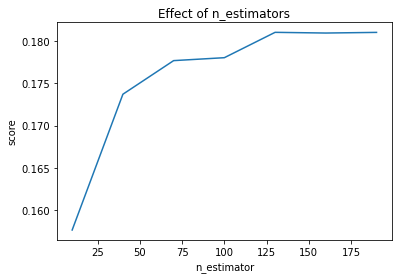

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=130, random_state=0, n_jobs=-1)
regressor.fit(X_train1, y_train)

RandomForestRegressor(n_estimators=130, n_jobs=-1, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.17869258308610914

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

20.556990432461898

# PCA - Considering the first two Principal Components only

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_train2 = pca2.fit_transform(X_train[col])
X_test2 = pca2.transform(X_test[col])

In [ ]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.23095544, 0.20008168])

In [ ]:
type(explained_variance)

numpy.ndarray

In [ ]:
np.sum(explained_variance)

0.4310371201414902

In [ ]:
components = len(explained_variance)
components

2

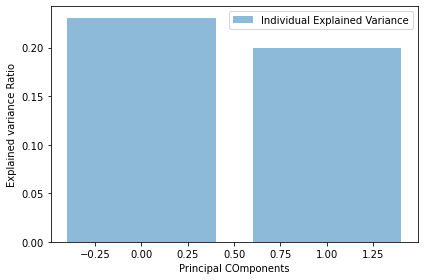

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained variance Ratio")
plt.xlabel("Principal COmponents")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators= n, n_jobs= -1)
    model.fit(X_train2, y_train)
    scores.append(model.score(X_test2, y_test))
print(scores)
print(sum(scores)/len(scores))

100%|██████████| 7/7 [00:14<00:00,  2.03s/it]

[0.7285474231376876, 0.7488271199946988, 0.7529168133527848, 0.7522669369225139, 0.7529737198051083, 0.7540106348679305, 0.7530125107668582]
0.7489364512639404


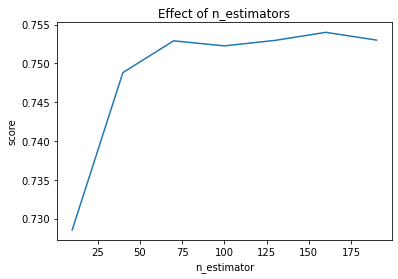

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=162, random_state=0, n_jobs=-1)
regressor.fit(X_train2, y_train)

RandomForestRegressor(n_estimators=162, n_jobs=-1, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test2)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.7529500157167166

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.274546358080796

# PCA - Considering the first three Principal Components only

In [ ]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X_train3 = pca3.fit_transform(X_train[col])
X_test3 = pca3.transform(X_test[col])

In [ ]:
explained_variance = pca3.explained_variance_ratio_
explained_variance

array([0.23095544, 0.20008168, 0.14512303])

In [ ]:
type(explained_variance)

numpy.ndarray

In [ ]:
np.sum(explained_variance)

0.5761601542926303

In [ ]:
components = len(explained_variance)
components

3

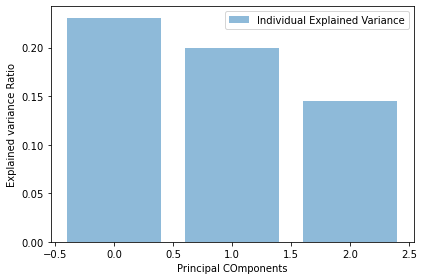

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained variance Ratio")
plt.xlabel("Principal COmponents")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators= n, n_jobs= -1)
    model.fit(X_train3, y_train)
    scores.append(model.score(X_test3, y_test))
print(scores)
print(sum(scores)/len(scores))

100%|██████████| 7/7 [00:18<00:00,  2.62s/it]

[0.8753122474987154, 0.8867677675381993, 0.8880208014172503, 0.8887621182956092, 0.8890372788184013, 0.8888433730568995, 0.8889802402810061]
0.8865319752722973


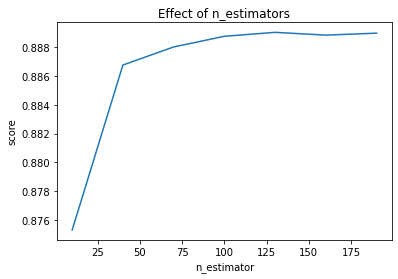

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=131, random_state=0, n_jobs=-1)
regressor.fit(X_train3, y_train)

RandomForestRegressor(n_estimators=131, n_jobs=-1, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test3)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.8889577448804666

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.558764207691646

# PCA - Considering the first four Principal Components only

In [ ]:
from sklearn.decomposition import PCA
pca4 = PCA(n_components=4)
X_train4 = pca4.fit_transform(X_train[col])
X_test4 = pca4.transform(X_test[col])

In [ ]:
explained_variance = pca4.explained_variance_ratio_
explained_variance

array([0.23095544, 0.20008168, 0.14512303, 0.12865806])

In [ ]:
type(explained_variance)

numpy.ndarray

In [ ]:
np.sum(explained_variance)

0.7048182153961505

In [ ]:
components = len(explained_variance)
components

4

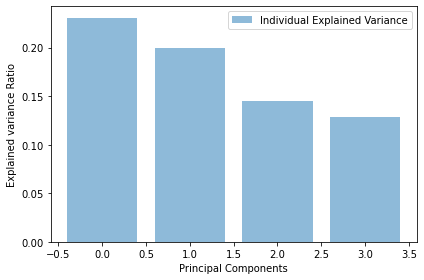

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel("Explained variance Ratio")
plt.xlabel("Principal Components")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators= n, n_jobs= -1)
    model.fit(X_train4, y_train)
    scores.append(model.score(X_test4, y_test))
print(scores)
print(sum(scores)/len(scores))

100%|██████████| 7/7 [00:23<00:00,  3.37s/it]

[0.9033992982500328, 0.9115115768292006, 0.9124446931759884, 0.9128986631487511, 0.9129705020147211, 0.9134668891501785, 0.9136419572162305]
0.9114762256835861


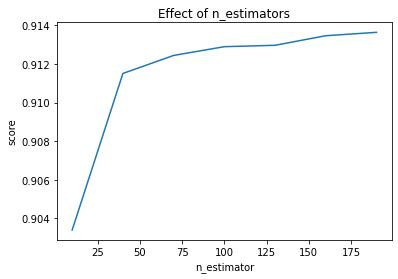

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
plt.show()

In [ ]:
regressor = RandomForestRegressor(n_estimators=187, random_state=0, n_jobs=-1)
regressor.fit(X_train4, y_train)

RandomForestRegressor(n_estimators=187, n_jobs=-1, random_state=0)

In [ ]:
y_pred = regressor.predict(X_test4)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y_test, y_pred)

0.9131399735697852

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.6852344107446795

__Therefore, we come to a conclusion that instead of choosing all 9 columns, it is better to choose just the first four principal Components as they have captured the maximum variance in the IV's.__

# End of PCA